# Exploring & Testing Use of NURBS in DIC
## Sam Potter
## Current: 12/3/18

## Path and Imports

In [1]:
# bootstrap $PATH
import sys
import os
sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\BitBucket\dic',
                 'C:/Users/potterst1/Desktop/REpositories/BitBucket/dic'])
from dic import nurbs
from dic import fileIO
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Magics

In [2]:
%matplotlib inline

### Read in ref image file

In [3]:
# Read
# Hard code absolute paths for now. Fix later'
dic_name = 'C:\\Users\\potterst1\\Desktop\\Repositories\\BitBucket\\dic\\data\\DIC_S_cropped_gray_pad_0.tiff'
psfdi_name = 'C:\\Users\\potterst1\\Desktop\\Repositories\\BitBucket\\dic\\data\\DIC_S_cropped_gray_pad_0.tiff'
ref_image = cv2.imread(dic_name, -1)  # Read in image 'as is'

In [4]:
ref_image.shape

(531, 509)

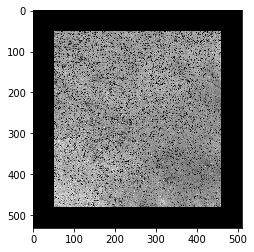

In [5]:
# Display
plt.imshow(ref_image, cmap='gray')

## Deform Ref Image

In [6]:
# Define affine warp function
def im_warp(image, warp_mat):
    """
    Apply an affine warp to an image using OpenCV's affine warp function
    
    :param image: image to warped. Grayscale shape: [N x M]. Color shape: [N x M x 3]
    :type image: ndarray
    :param warp_mat: affine warp matrix. Shape: [2, 3]. See OpenCV documentation for details
    :type warp_mat: ndarray
    :return: warped image
    :rtype ndarray
    """
    
    # Sanitize inputs
    if not(len(image.shape) == 2 or len(image.shape) == 3):
        raise ValueError("Image input does not have correct dimensions")
        
    if warp_mat.shape != (2, 3):
        raise ValueError("Warp matrix input does not have correct dimension")
    
    # Get shape of image
    rows, cols = image.shape
    
    # Cast the warp matrix as 32 bit floast
    warp_mat = np.float32(warp_mat)
    
    # Warp the image and require the output to be the same size as input
    warped_im = cv2.warpAffine(image, warp_mat, (cols, rows))
    
    return warped_im

In [7]:
# Translate image in x
transx = np.array([[1.0, 0.0, 25.0],
                   [0.0, 1.0, 0.0]])
transx_im = im_warp(ref_image, transx)

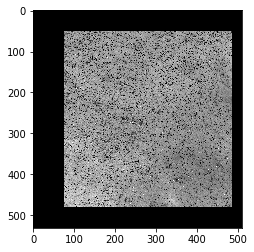

In [8]:
# Display
plt.imshow(transx_im, cmap='gray')